# Ekstrakcja cech z obrazu
Opracowanie: A.Florkowska
\
Repozytorium: https://github.com/aflorkowska/Image-Processing/tree/main

In [1]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.ndimage
import matplotlib.pyplot as plt
from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from IPython.display import Image

# Ekstrakcja cech

Proces ekstrakcji cech odnosi się do identyfikacji, selekcji i wyodrębniania istotnych cech z obrazu, które mogą być używane do analizy, rozpoznawania wzorców, klasyfikacji lub innych zadań przetwarzania obrazów. Jest on kluczowym krokiem, ponieważ pozwala na redukcję wymiarowości danych, eliminując nieistotne informacje i koncentrując się na tych szczególnym dla konkretnego zadania.

Istnieje wiele różnych metod ekstrakcji cech, z których każda może być odpowiednia w zależności od konkretnego problemu i typu danych obrazowych. Mogą być one przeprowadzone zarówno w dziedzinie przetrzennej (piksele), jak i dziedzinie częstotliwości.  

Zazwyczaj techniki te są podzielone ze względu na rodzaj cech, który ekstrahują, tzn. dotyczące:
- koloru obrazu
- tekstury obrazu
- geometrii i kształtów na obrazie
- cech statystycznych obrazu

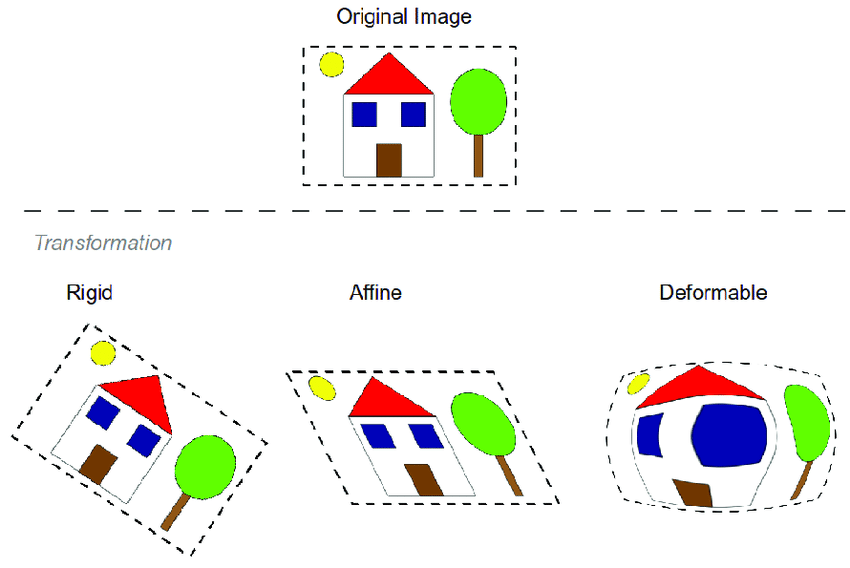

In [2]:
Image(filename=".././images/8_1.png", width=600)

Analiza obrazu może być przeprowadzana zarówno manualnie, przez człowieka (analiza ręczna), jak i automatycznie, za pomocą algorytmów i technik przetwarzania obrazów (analiza automatyczna). 

W przypadku analizy automatycznej wydzielić można dwa główne spotykane nurty: 
- analiza przy użyciu metod uczenia maszynowego (ML)
- analiza przy użyciu sieci głębokich (DL)

W obu przypadkach proces ten składa się z etapu ekstrakcji cech. Przy zastosowaniu metod uczenia maszynowego na danych obrazowych należy najpierw wyekstrahować cechy przy użyciu któreś z metod opisanej w tych notatniku, a następnie zastosować je jako dane wejściowego dla wybranego algorytmu ML. Natomiast w przypadku sieci głębokich, ten etap jest realizowany przez konkretne warstwy np. konwolucyjne. 